# Importing Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objects as go
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

# Read .csv file

In [2]:
orders = pd.read_csv('orders.csv')
order_items = pd.read_csv('order_items.csv')
sellers = pd.read_csv('sellers.csv')
products = pd.read_csv('products.csv')
payments = pd.read_csv('payments.csv')
customers = pd.read_csv('customers.csv')
user_feedback = pd.read_csv('user_feedback.csv')

### Displaying all datasets

In [3]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_to_carrier_date,order_delivered_to_customer_date,order_estimated_delivery_date
0,e481f51cbd,9ef432eb62,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8b,b0830fb474,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb910,41ce2a54c0,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44db,f88197465e,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c08,8ab97904e6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
order_items.head()

,order_id,product_id,seller_id,price
0,00010242fe,4244733e06,48436dade1,58
1,00018f77f2,e5f2d52b80,dd7ddc04e1,239
2,000229ec39,c777355d18,5b51032edd,199
3,00024acbcd,7634da152a,9d7a1d34a5,12
4,00042b26cf,ac6c362306,df560393f3,199


In [5]:
sellers.head()

,seller_id,seller_state
0,3442f8959a,SP
1,d1b65fc7de,SP
2,ce3ad9de96,RJ
3,c0f3eea2e1,SP
4,51a04a8a6b,SP


In [6]:
products.head()

,product_id,product_photos_count,product_length_cm,product_height_cm,product_width_cm,product_category_name,product_weight_kg
0,1e9e8ef04d,1.0,16.0,10.0,14.0,perfumery,0.225
1,3aa071139c,1.0,30.0,18.0,20.0,art,1.000
2,96bd76ec88,1.0,18.0,9.0,15.0,sports_leisure,0.154
3,cef67bcfe1,1.0,26.0,4.0,26.0,baby,0.371
4,9dc1a7de27,4.0,20.0,17.0,13.0,housewares,0.625


In [7]:
payments.head()

,order_id,payment_type,payment_value
0,b81ef226f3,credit_card,99
1,a9810da829,credit_card,24
2,25e8ea4e93,credit_card,65
3,ba78997921,credit_card,107
4,42fdf880ba,credit_card,128


In [8]:
payments['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [9]:
customers.head()

,customer_id,customer_unique_id,customer_state
0,06b8999e2f,861eff4711,SP
1,18955e83d3,290c77bc52,SP
2,4e7b3e0028,060e732b5b,SP
3,b2b6027bc5,259dac7578,SP
4,4f2d8ab171,345ecd01c3,SP


In [10]:
user_feedback.head()

,review_id,order_id,review_score,survey_sent_date,survey_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af871,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c,5,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b2,5,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b,5,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e2,5,2018-03-01 00:00:00,2018-03-02 10:26:53


# Merging Dataset & Data cleaning

In [11]:
orders_list= pd.merge(orders, order_items, on='order_id')

In [12]:
purchase_date_split= orders_list['order_purchase_timestamp'].str.split(' ')

In [13]:
orders_list['order_purchase_date']=purchase_date_split.str.get(0)

In [14]:
purchase_date_split= orders_list['order_purchase_date'].str.split('-')

In [15]:
orders_list['year']=purchase_date_split.str.get(0)
orders_list['month']=purchase_date_split.str.get(1)
orders_list['day']=purchase_date_split.str.get(2)

In [16]:
orders_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   order_id                          112650 non-null  object
 1   customer_id                       112650 non-null  object
 2   order_status                      112650 non-null  object
 3   order_purchase_timestamp          112650 non-null  object
 4   order_approved_at                 112635 non-null  object
 5   order_delivered_to_carrier_date   111456 non-null  object
 6   order_delivered_to_customer_date  110196 non-null  object
 7   order_estimated_delivery_date     112650 non-null  object
 8   product_id                        112650 non-null  object
 9   seller_id                         112650 non-null  object
 10  price                             112650 non-null  int64 
 11  order_purchase_date               112650 non-null  object
 12  ye

In [17]:
orders_list["order_purchase_date"]= pd.to_datetime(orders_list["order_purchase_date"])

In [18]:
a= pd.merge(orders_list, sellers, on='seller_id')
b=pd.merge(a,payments,on='order_id')
c=pd.merge(b,customers,on='customer_id')
d=pd.merge(c,user_feedback,on='order_id')
data=pd.merge(d,products,on='product_id')

In [19]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_to_carrier_date,order_delivered_to_customer_date,order_estimated_delivery_date,product_id,seller_id,...,review_id,review_score,survey_sent_date,survey_answer_timestamp,product_photos_count,product_length_cm,product_height_cm,product_width_cm,product_category_name,product_weight_kg
0,e481f51cbd,9ef432eb62,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b3488,3504c0cb71,...,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11 00:00:00,2017-10-12 03:43:48,4.0,19.0,8.0,13.0,housewares,0.5
1,e481f51cbd,9ef432eb62,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b3488,3504c0cb71,...,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11 00:00:00,2017-10-12 03:43:48,4.0,19.0,8.0,13.0,housewares,0.5
2,e481f51cbd,9ef432eb62,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b3488,3504c0cb71,...,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11 00:00:00,2017-10-12 03:43:48,4.0,19.0,8.0,13.0,housewares,0.5
3,128e10d957,a20e8105f2,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,87285b3488,3504c0cb71,...,b46f1e34512b0f4c74a72398b03ca788,4,2017-08-19 00:00:00,2017-08-20 15:16:36,4.0,19.0,8.0,13.0,housewares,0.5
4,0e7e841ddf,26c7ac168e,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,87285b3488,3504c0cb71,...,dc90f19c2806f1abba9e72ad3c350073,5,2017-08-08 00:00:00,2017-08-08 23:26:23,4.0,19.0,8.0,13.0,housewares,0.5


In [20]:
data.isnull().sum()

order_id                               0
customer_id                            0
order_status                           0
order_purchase_timestamp               0
order_approved_at                     15
order_delivered_to_carrier_date     1254
order_delivered_to_customer_date    2588
order_estimated_delivery_date          0
product_id                             0
seller_id                              0
price                                  0
order_purchase_date                    0
year                                   0
month                                  0
day                                    0
seller_state                           0
payment_type                           0
payment_value                          0
customer_unique_id                     0
customer_state                         0
review_id                              0
review_score                           0
survey_sent_date                       0
survey_answer_timestamp                0
product_photos_c

In [21]:
data.dropna(inplace=True)

# Data visualisaion

In [22]:
#graph with the total sales- price- over time
#plot the graph
sales_by_time= orders_list.groupby(["order_purchase_date"],as_index=False)["price"].sum()
fig = px.line(sales_by_time, x="order_purchase_date", y="price")
fig.update_layout(title_text='sales',title_x=0.5,template='plotly')
fig.show()

In [23]:
monthly_sales = orders_list.groupby(["month"],as_index=False)["price"].sum().sort_values('month')

fig = px.bar(monthly_sales,x='month', y='price',color = 'month')
fig.update_layout(title_text='Monthly sales',title_x=0.5
                  ,template='seaborn')
fig.show()

In [24]:
#order_status
order_status_levels = pd.DataFrame(orders.order_status.value_counts().reset_index())
px.pie(order_status_levels,values='order_status',names='index',
      title='Percentage counts of order status',
      color_discrete_sequence=px.colors.diverging.PiYG)

In [25]:
s_state= sellers.seller_state.value_counts().reset_index().head()
fig = px.bar(s_state,x='index', y='seller_state',color = 'seller_state')
fig.update_layout(title_text='State-wise Sellers Count',title_x=0.5
                  ,template='gridon')
fig.show()

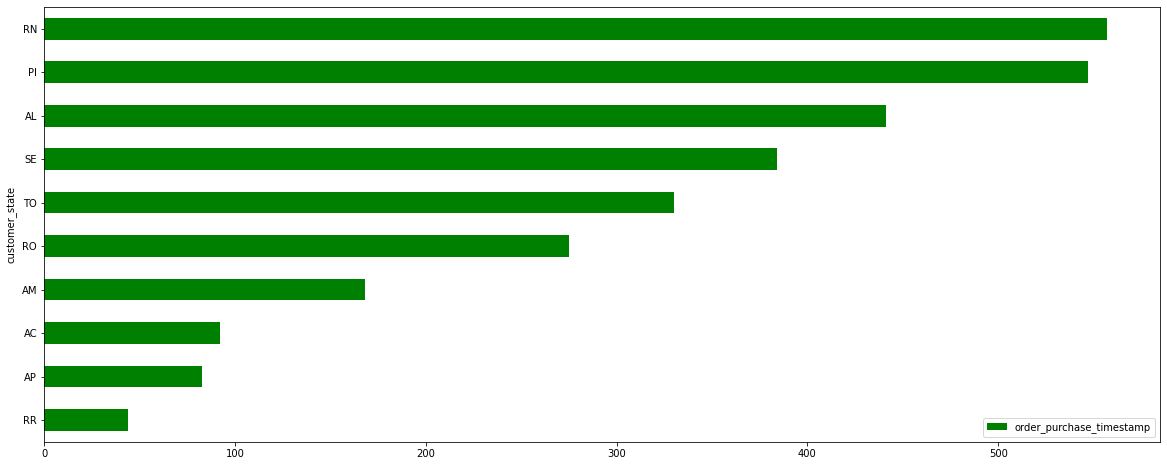

In [26]:
#top 10 states as per number of orders
data.groupby(data['customer_state'])['order_purchase_timestamp'].count().sort_values()[:10].plot(kind='barh',figsize=(20,8),color='green')
plt.legend()
plt.show()

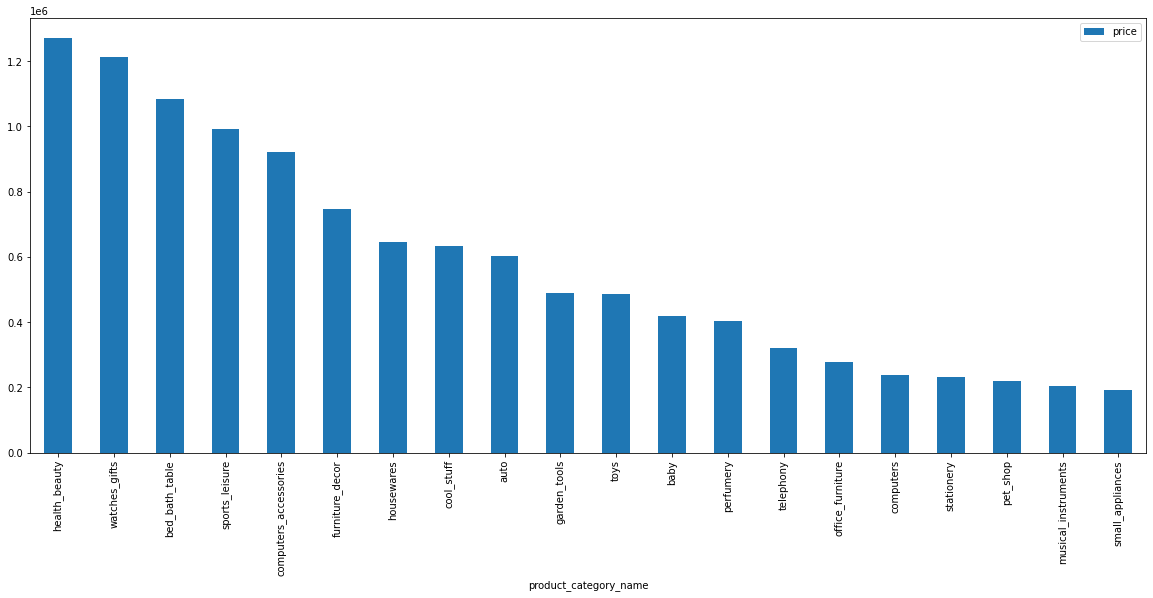

In [27]:
#category wise sales with their rating(top 20)
data.groupby(data['product_category_name'])['price'].sum().sort_values(ascending=False)[:20].plot(kind='bar',figsize=(20,8))
plt.legend()
plt.show()

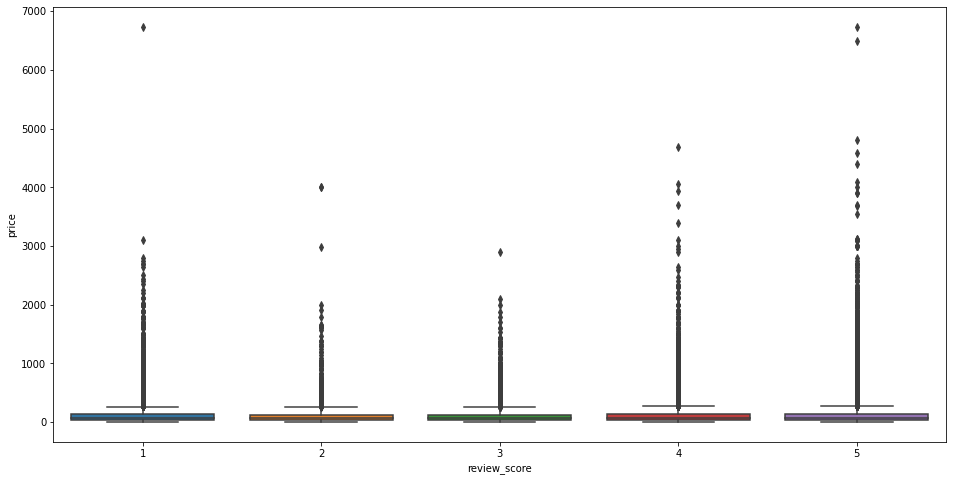

In [28]:
#Box plot for price with review score
plt.figure(figsize= (16,8))
sns.boxplot(x='review_score',y='price', data=data)
plt.show()

<AxesSubplot:xlabel='seller_state,customer_state,order_id'>

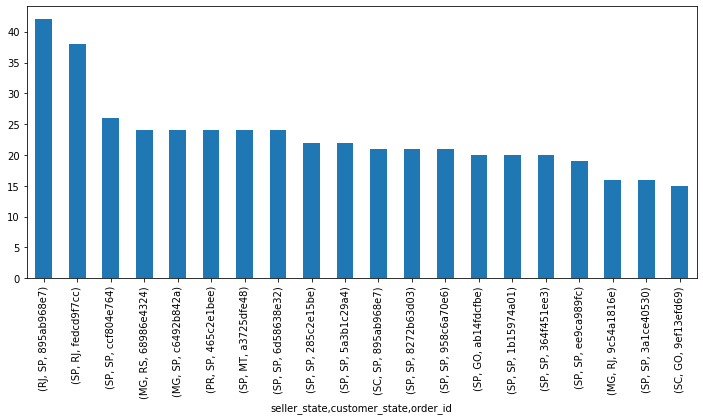

In [29]:
#Count the number of origem states and destination states 
data.groupby(['seller_state', 'customer_state']).order_id.value_counts().nlargest(20).plot(kind='bar',figsize=(12,5))

<AxesSubplot:xlabel='seller_state'>

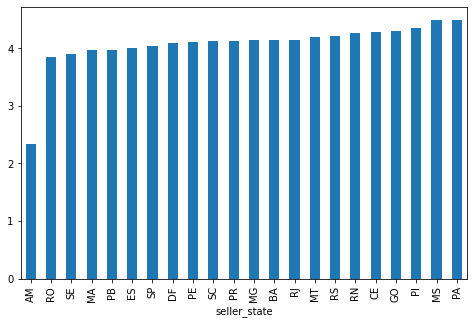

In [30]:
#sellers with the worst review scores by state
data.groupby(['seller_state']).review_score.mean().nsmallest(30).plot(kind='bar',figsize=(8,5))

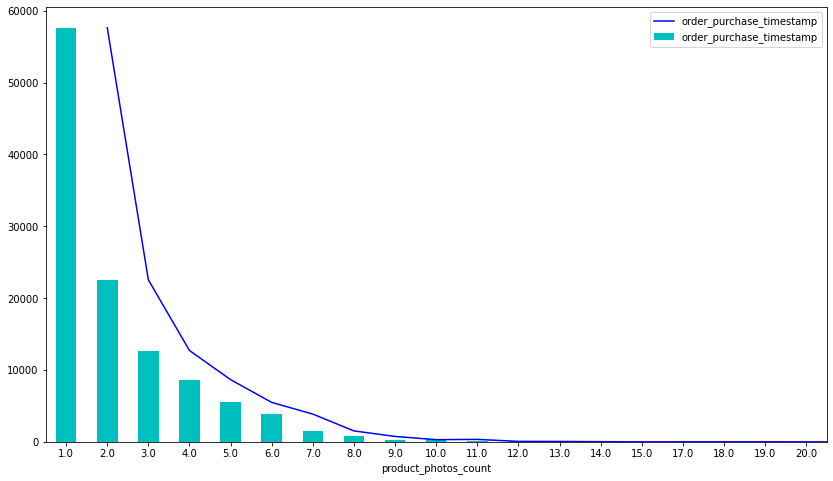

In [31]:
#plot showing relationship among number of photos and the count of number of orders
d = data.groupby(data['product_photos_count'].astype(str).astype(float))['order_purchase_timestamp'].count()
d.plot(kind='bar',figsize=(14,8),color='c')
d.plot(kind='line',figsize=(14,8),color='b')
plt.legend()
plt.show()

In [32]:
CP= data[['customer_id','payment_type']]

group_1=CP.groupby(['payment_type'],as_index=False).count()
group_1

px.pie(group_1,values='customer_id',names='payment_type',
      title='Percentage count of payment_type',
      color_discrete_sequence=px.colors.diverging.Armyrose)


In [33]:
CP= data[['customer_id','order_id']]

group_2=CP.groupby(['customer_id'],as_index=False).count().sort_values('order_id',ascending = False).head(10)
group_2

fig = px.bar(group_2,x='customer_id', y='order_id',color = 'customer_id')
fig.update_layout(title_text='highest orders by customer',title_x=0.5
                  ,template='gridon')
fig.show()

In [34]:
PO= data[['product_id','order_id']]

group_3=PO.groupby(['product_id'],as_index=False).count().sort_values('order_id',ascending = False).head(10)
group_3

fig = px.bar(group_3,x='product_id', y='order_id',color = 'product_id')
fig.update_layout(title_text='highest sales in product id',title_x=0.5
                  ,template='gridon')
fig.show()

In [35]:
PO= data[['product_category_name','order_id']]

group_4=PO.groupby(['product_category_name'],as_index=False).count().sort_values('order_id',ascending = False).head(10)
group_4


fig = px.bar(group_4,x='product_category_name', y='order_id',color = 'product_category_name')
fig.update_layout(title_text='highest sales in product category',title_x=0.5
                  ,template='gridon')
fig.show()

# Feature Engineering

In [36]:
data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_to_carrier_date',
       'order_delivered_to_customer_date', 'order_estimated_delivery_date',
       'product_id', 'seller_id', 'price', 'order_purchase_date', 'year',
       'month', 'day', 'seller_state', 'payment_type', 'payment_value',
       'customer_unique_id', 'customer_state', 'review_id', 'review_score',
       'survey_sent_date', 'survey_answer_timestamp', 'product_photos_count',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name', 'product_weight_kg'],
      dtype='object')

feature engineering

In [37]:
#converting the timestamp format data to date data as we need just the date and not the exact time
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp']).dt.date
data['order_estimated_delivery_date'] = pd.to_datetime(data['order_estimated_delivery_date']).dt.date
data['order_delivered_to_customer_date'] = pd.to_datetime(data['order_delivered_to_customer_date']).dt.date

In [38]:
#subtracting the order_purchase_time to rest time based feature and converting date time into string to remove the timestamp notation 
data['delivery_days'] = data['order_delivered_to_customer_date'].sub(data['order_purchase_timestamp'],axis=0).astype(str)
data['estimated_days'] = data['order_estimated_delivery_date'].sub(data['order_purchase_timestamp'],axis=0).astype(str)

In [39]:
#replacing the time stamp notation and converting type to int
data['delivery_days'] = data['delivery_days'].str.replace(" days","")
data['estimated_days'] = data['estimated_days'].str.replace(" days","")

In [40]:
data['delivery_days'] = data['delivery_days'].str.split(' ').str[0].astype(int)
data['estimated_days'] = data['estimated_days'].str.split(' ').str[0].astype(int)

In [41]:
data['arrival_time'] = (data['estimated_days'] - data['delivery_days']).apply(lambda x: 'Early/OnTime' if x > 0 else 'Late')

C:\Users\VENKATESH\anaconda3\envs\cust\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\VENKATESH\anaconda3\envs\cust\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



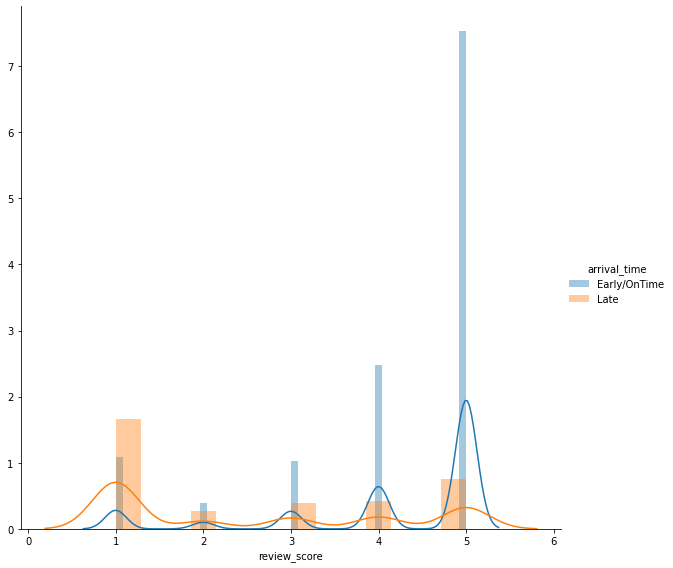

In [42]:
sns.FacetGrid(data, hue="arrival_time", height=8) \
   .map(sns.distplot, 'review_score') \
   .add_legend();
plt.show();

In [43]:
#dropping exceptional delivery or possible outliers
ix = data[(data['delivery_days'] > 60) | (data['estimated_days'] > 60) ].index
print(ix.shape)

print('Percentage of extermely late delivered packages in the dataset is: {}%'.format(round((((ix.shape[0])/(data.shape[0])))*100,3)))
#we can remove those outliers
data.drop(ix,inplace=True)

(627,)
Percentage of extermely late delivered packages in the dataset is: 0.55%


In [44]:
#binning and grouping delivery times into groups or classes

delivery_feedbacks = []
estimated_del_feedbacks = []
d_days = data.delivery_days.values.tolist()
est_days = data.estimated_days.values.tolist()

#actural delivery days
for i in d_days:
    if i in range(0,8):
        delivery_feedbacks.append('Very_Fast')
    elif i in range(8,16):
        delivery_feedbacks.append('Fast')
    elif i in range(16,25):
        delivery_feedbacks.append('Neutral')
    elif i in range(25,40):
        delivery_feedbacks.append('Slow')
    elif i in range(40,61):
        delivery_feedbacks.append('Worst')

#estimated delivery days
for i in est_days:
    if i in range(0,8):
        estimated_del_feedbacks.append('Very_Fast')
    elif i in range(8,16):
        estimated_del_feedbacks.append('Fast')
    elif i in range(16,25):
        estimated_del_feedbacks.append('Neutral')
    elif i in range(25,40):
        estimated_del_feedbacks.append('Slow')
    elif i in range(40,61):
        estimated_del_feedbacks.append('Worst')


In [45]:
#putting list values into the dataframe as feature
data['delivery_impression'] = delivery_feedbacks
data['estimated_del_impression'] = estimated_del_feedbacks

In [46]:
from collections import Counter
#finding all those customers who have made multiple product purchases
order_counts = [k for k,v in Counter(data.customer_unique_id).items() if v > 1]
existing_cust = []
for i in data.customer_unique_id.values:
    if i in order_counts:
        existing_cust.append(1)
    else:
        existing_cust.append(0)
len(existing_cust)

113446

In [47]:
data['existing_cust'] = existing_cust

<AxesSubplot:ylabel='review_score'>

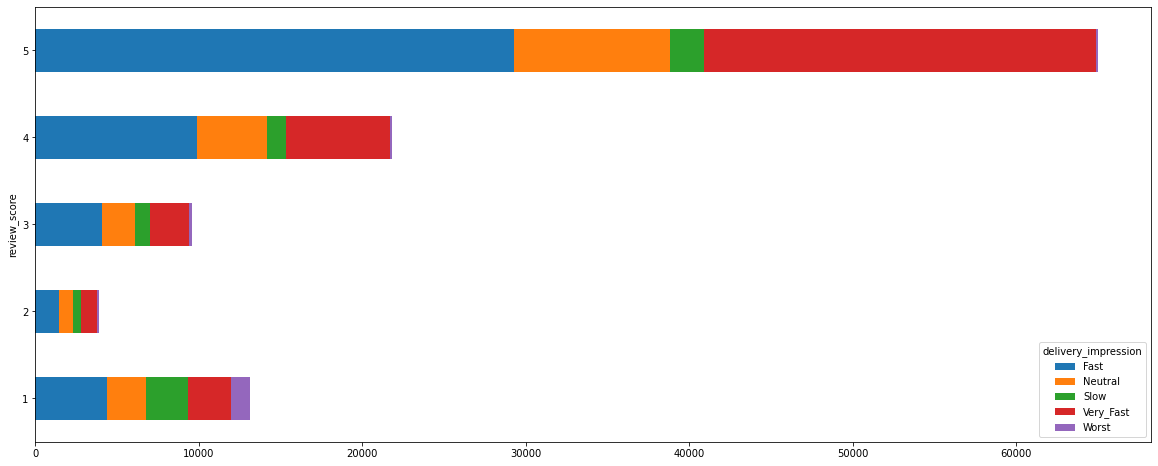

In [48]:
#Delivery Days histogram with review rating as hue
df_plot = data.groupby(['delivery_impression', 'review_score']).size().reset_index().pivot(columns='delivery_impression', index='review_score', values=0)
df_plot.plot(kind='barh',stacked=True,figsize=(20,8))

In [49]:
#if score<=3, set score = 0 
data.loc[data['review_score'] < 3 ,'Score'] = 0
data.loc[data['review_score'] > 3,'Score'] = 1
#removing neutral reviews
data.drop(data[data['review_score'] == 3].index,inplace=True)
data.drop('review_score',axis=1,inplace=True)

In [50]:
data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_to_carrier_date',
       'order_delivered_to_customer_date', 'order_estimated_delivery_date',
       'product_id', 'seller_id', 'price', 'order_purchase_date', 'year',
       'month', 'day', 'seller_state', 'payment_type', 'payment_value',
       'customer_unique_id', 'customer_state', 'review_id', 'survey_sent_date',
       'survey_answer_timestamp', 'product_photos_count', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'product_category_name',
       'product_weight_kg', 'delivery_days', 'estimated_days', 'arrival_time',
       'delivery_impression', 'estimated_del_impression', 'existing_cust',
       'Score'],
      dtype='object')

In [51]:
#dropping features
data.drop(['customer_unique_id','seller_id','product_id','order_id','customer_id','order_status',
           'order_approved_at','order_delivered_to_carrier_date','order_delivered_to_customer_date',
           'order_estimated_delivery_date','order_purchase_date','year','month','day',
           'review_id','survey_sent_date','survey_answer_timestamp','product_length_cm',
           'product_height_cm', 'product_width_cm','product_weight_kg','order_purchase_timestamp'],axis=1,inplace=True)
           

In [52]:
data.columns

Index(['price', 'seller_state', 'payment_type', 'payment_value',
       'customer_state', 'product_photos_count', 'product_category_name',
       'delivery_days', 'estimated_days', 'arrival_time',
       'delivery_impression', 'estimated_del_impression', 'existing_cust',
       'Score'],
      dtype='object')

In [53]:
data.head()

,price,seller_state,payment_type,payment_value,customer_state,product_photos_count,product_category_name,delivery_days,estimated_days,arrival_time,delivery_impression,estimated_del_impression,existing_cust,Score
0,29,SP,credit_card,18,SP,4.0,housewares,8,16,Early/OnTime,Fast,Neutral,1,1.0
1,29,SP,voucher,2,SP,4.0,housewares,8,16,Early/OnTime,Fast,Neutral,1,1.0
2,29,SP,voucher,18,SP,4.0,housewares,8,16,Early/OnTime,Fast,Neutral,1,1.0
3,29,SP,credit_card,37,SP,4.0,housewares,3,13,Early/OnTime,Very_Fast,Fast,0,1.0
4,29,SP,credit_card,37,SP,4.0,housewares,5,13,Early/OnTime,Very_Fast,Fast,0,1.0


In [54]:
a = list(data['delivery_impression'].unique())
a.sort()
a

['Fast', 'Neutral', 'Slow', 'Very_Fast', 'Worst']

# Modelling

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import f1_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [56]:
#spliting data to train and test data
X = data.drop('Score',axis=1)
Y = data.Score.values

In [57]:
numeric_features = ['price','payment_value','product_photos_count','delivery_days','estimated_days']

In [58]:
categorical_feature = ['payment_type','customer_state','seller_state','product_category_name','arrival_time',
                               'delivery_impression','estimated_del_impression','existing_cust']

In [59]:
ss = StandardScaler()

# ss, now u go and study these numeric columns --> i.e. fit() over it
ss.fit(X[numeric_features])

# ss, now appear for the test
X[numeric_features] = ss.transform(X[numeric_features])
X

,price,seller_state,payment_type,payment_value,customer_state,product_photos_count,product_category_name,delivery_days,estimated_days,arrival_time,delivery_impression,estimated_del_impression,existing_cust
0,-0.491016,SP,credit_card,-0.569521,SP,1.043748,housewares,-0.488630,-0.976763,Early/OnTime,Fast,Neutral,1
1,-0.491016,SP,voucher,-0.628793,SP,1.043748,housewares,-0.488630,-0.976763,Early/OnTime,Fast,Neutral,1
2,-0.491016,SP,voucher,-0.569521,SP,1.043748,housewares,-0.488630,-0.976763,Early/OnTime,Fast,Neutral,1
3,-0.491016,SP,credit_card,-0.499135,SP,1.043748,housewares,-1.095309,-1.330383,Early/OnTime,Very_Fast,Fast,0
4,-0.491016,SP,credit_card,-0.499135,SP,1.043748,housewares,-0.852637,-1.330383,Early/OnTime,Very_Fast,Fast,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118307,-0.410284,SC,credit_card,-0.139798,MG,-0.119957,sports_leisure,-0.124622,-0.505271,Early/OnTime,Fast,Neutral,1
118310,-0.221909,SP,boleto,-0.291682,SP,-0.119957,construction_tools_lights,-0.488630,-0.623144,Early/OnTime,Fast,Neutral,0
118312,1.500377,SP,debit_card,1.008600,CE,-0.119957,furniture_decor,-0.367294,-0.151651,Early/OnTime,Fast,Neutral,0
118313,0.531591,SP,credit_card,0.267698,MG,-0.701810,furniture_decor,1.088737,-0.858890,Late,Neutral,Neutral,0


In [60]:
X = pd.get_dummies(X, columns= categorical_feature)
X

,price,payment_value,product_photos_count,delivery_days,estimated_days,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,customer_state_AC,...,delivery_impression_Slow,delivery_impression_Very_Fast,delivery_impression_Worst,estimated_del_impression_Fast,estimated_del_impression_Neutral,estimated_del_impression_Slow,estimated_del_impression_Very_Fast,estimated_del_impression_Worst,existing_cust_0,existing_cust_1
0,-0.491016,-0.569521,1.043748,-0.488630,-0.976763,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,-0.491016,-0.628793,1.043748,-0.488630,-0.976763,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,-0.491016,-0.569521,1.043748,-0.488630,-0.976763,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,-0.491016,-0.499135,1.043748,-1.095309,-1.330383,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4,-0.491016,-0.499135,1.043748,-0.852637,-1.330383,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118307,-0.410284,-0.139798,-0.119957,-0.124622,-0.505271,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
118310,-0.221909,-0.291682,-0.119957,-0.488630,-0.623144,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
118312,1.500377,1.008600,-0.119957,-0.367294,-0.151651,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
118313,0.531591,0.267698,-0.701810,1.088737,-0.858890,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [69]:
X.shape

(103859, 144)

In [61]:
list(X.columns)

['price',
 'payment_value',
 'product_photos_count',
 'delivery_days',
 'estimated_days',
 'payment_type_boleto',
 'payment_type_credit_card',
 'payment_type_debit_card',
 'payment_type_voucher',
 'customer_state_AC',
 'customer_state_AL',
 'customer_state_AM',
 'customer_state_AP',
 'customer_state_BA',
 'customer_state_CE',
 'customer_state_DF',
 'customer_state_ES',
 'customer_state_GO',
 'customer_state_MA',
 'customer_state_MG',
 'customer_state_MS',
 'customer_state_MT',
 'customer_state_PA',
 'customer_state_PB',
 'customer_state_PE',
 'customer_state_PI',
 'customer_state_PR',
 'customer_state_RJ',
 'customer_state_RN',
 'customer_state_RO',
 'customer_state_RR',
 'customer_state_RS',
 'customer_state_SC',
 'customer_state_SE',
 'customer_state_SP',
 'customer_state_TO',
 'seller_state_AM',
 'seller_state_BA',
 'seller_state_CE',
 'seller_state_DF',
 'seller_state_ES',
 'seller_state_GO',
 'seller_state_MA',
 'seller_state_MG',
 'seller_state_MS',
 'seller_state_MT',
 'seller_s

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.30,stratify=Y,random_state=42)

In [63]:
lr = LogisticRegression()
model = lr.fit(X_train, y_train)

C:\Users\VENKATESH\anaconda3\envs\cust\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [64]:
y_pred = model.predict(X_test)

In [65]:
print("Accuracy:\n")
accuracy_score(y_test,y_pred)

Accuracy:



0.8614160087297003

In [66]:
from sklearn.metrics import classification_report
print("Classification Report:\n")
print(classification_report(y_test,y_pred))

Classification Report:

              precision    recall  f1-score   support

         0.0       0.71      0.26      0.38      5109
         1.0       0.87      0.98      0.92     26049

    accuracy                           0.86     31158
   macro avg       0.79      0.62      0.65     31158
weighted avg       0.84      0.86      0.83     31158



In [67]:
print("Confusion Matrix:\n")
confusion_matrix(y_test,y_pred)

Confusion Matrix:



array([[ 1335,  3774],
       [  544, 25505]], dtype=int64)

In [68]:
import joblib
    
joblib.dump(model,"model.pickle")
joblib.dump(ss,"scaler.pickle")

['scaler.pickle']

# End of the project